In [42]:
import tensorflow as tf

In [69]:
# import dataset from keras

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [70]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

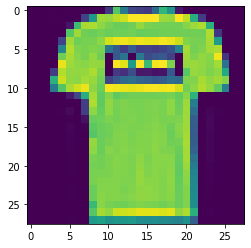

In [72]:
# visualizing data

import matplotlib.pyplot as plt

plt.imshow(x_train[1])

##**Preprocessing the data**

In [73]:
x_train = x_train/255. 
x_test = x_test/255.

In [74]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [77]:
x_test = x_test.reshape(x_test.shape[0], * (28,28,1) )

x_train = x_train.reshape(x_train.shape[0], * (28,28,1))

x_test.shape, x_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [11]:
# building the model

import tensorflow as tf
from tensorflow.keras import layers


inputs = layers.Input(shape=(28,28,1))

x = layers.Conv2D(filters= 64, kernel_size= 3, activation= "relu")(inputs)
x = layers.MaxPooling2D(pool_size= 2)(x)
x = layers.Conv2D(filters= 64, kernel_size= 3, activation= "relu")(x)
x = layers.MaxPooling2D(pool_size= 2)(x)

x = layers.Flatten()(x)

x = layers.Dense(64, activation= "relu")(x)

outputs = layers.Dense(10, activation= "softmax")(x)

model = tf.keras.Model(inputs, outputs)



# compiling the model

model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

# fitting the model

model_hist = model.fit(
    x_train,y_train,
    epochs = 150,
    batch_size = 64,
    validation_data = (x_test,y_test),
)






Epoch 1/150
938/938 [==============================] - 37s 8ms/step - loss: 0.4955 - accuracy: 0.8229 - val_loss: 0.3786 - val_accuracy: 0.8637
Epoch 2/150
938/938 [==============================] - 7s 7ms/step - loss: 0.3277 - accuracy: 0.8806 - val_loss: 0.3378 - val_accuracy: 0.8805
Epoch 3/150
938/938 [==============================] - 7s 7ms/step - loss: 0.2831 - accuracy: 0.8959 - val_loss: 0.3026 - val_accuracy: 0.8900
Epoch 4/150
938/938 [==============================] - 7s 7ms/step - loss: 0.2536 - accuracy: 0.9076 - val_loss: 0.2766 - val_accuracy: 0.9002
Epoch 5/150
938/938 [==============================] - 7s 7ms/step - loss: 0.2276 - accuracy: 0.9165 - val_loss: 0.2552 - val_accuracy: 0.9095
Epoch 6/150
938/938 [==============================] - 7s 7ms/step - loss: 0.2054 - accuracy: 0.9246 - val_loss: 0.2743 - val_accuracy: 0.8999
Epoch 7/150
938/938 [==============================] - 7s 7ms/step - loss: 0.1908 - accuracy: 0.9291 - val_loss: 0.2619 - val_accuracy: 0.906

In [12]:
model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

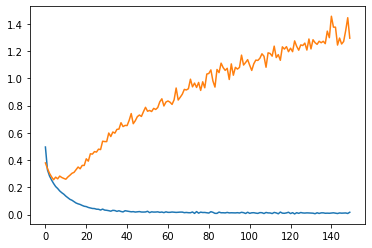

In [14]:
# plotting the training loss and validation loss

import matplotlib.pyplot as plt

plt.plot(model_hist.history["loss"])
plt.plot(model_hist.history["val_loss"])


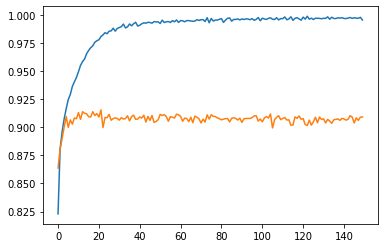

In [15]:
# plotting the training loss and validation loss

import matplotlib.pyplot as plt

plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history["val_accuracy"])

In [26]:
model_evaluation = model.evaluate(x_test, y_test)
model_evaluation
print(f"Model Accuracy: {model_evaluation[1]*100: 0.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 1.2947 - accuracy: 0.9091
Model Accuracy:  90.91%
